In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import scipy.optimize as opt
np.random.seed(seed=233423)

In [63]:
def RhoSq(y_hat, y_true):
    y_mean = np.mean(y_true)
    return(1 - sum((y_hat-y_true)**2)/sum((y_mean-y_true)**2)  )

In [64]:
Data = pd.read_csv("Seshat Data.csv")

In [65]:
Data

,NGA,PolID,Time,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,SPC1,MG_corr
0,Big Island Hawaii,Hawaii1,1000,3.854914,4.111759,2.282858,-0.653777,0.090909,0.100000,0.100000,0.100000,1.8,0.203229,0
1,Big Island Hawaii,Hawaii1,1100,3.854914,4.111759,2.282858,-0.653777,0.090909,0.100000,0.100000,0.100000,1.8,0.203229,0
2,Big Island Hawaii,Hawaii2,1200,3.750606,3.337475,3.363416,1.060611,0.090909,0.090909,0.150000,0.000000,1.8,0.222845,0
3,Big Island Hawaii,Hawaii2,1300,4.065673,3.337475,3.429545,0.943410,0.090909,0.090909,0.150000,0.000000,1.8,0.228982,0
4,Big Island Hawaii,Hawaii2,1400,4.192464,3.337475,3.584463,1.993130,0.090909,0.181818,0.150000,0.000000,1.8,0.258405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,Yemeni Coastal Plain,YeRasul,1400,5.881658,6.536808,4.698970,4.500000,0.977778,0.950000,1.000000,1.000000,4.5,0.801720,1
860,Yemeni Coastal Plain,YeTahir,1500,5.454290,5.762184,5.171692,4.500000,0.888889,0.966667,1.000000,1.000000,5.0,0.797062,1
861,Yemeni Coastal Plain,TrOttm3,1600,7.447158,6.684486,5.819190,8.036426,0.990909,0.916667,1.000000,1.000000,5.0,0.958307,1
862,Yemeni Coastal Plain,YeQasmi,1700,5.418268,5.553020,3.661252,3.000000,0.572727,0.272727,0.833333,0.814286,5.0,0.568928,1


## SPC1 Break Point for RelTime


In [66]:
np.median(Data["SPC1"])

0.356081775

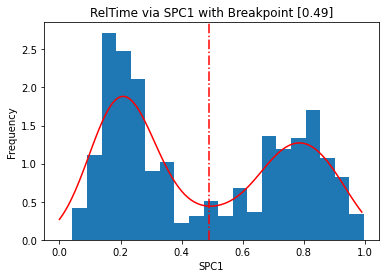

In [113]:
plt.hist(Data["SPC1"], bins = 20, density = True)

x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["SPC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
plt.plot(x, KDE, c="red")
plt.axvline(xmin, linestyle="-.",c="red", )
plt.title("RelTime via SPC1 with Breakpoint "+str(np.round(xmin,2)))
plt.xlabel("SPC1")
plt.ylabel("Frequency")
plt.show()

SPC_Break = xmin

### IDEA

If this is too restrictive, maybe choose the first maximum around 0.2 as the "Time Zero". Aka the first emergence of medium-to-large structure.

PolPop


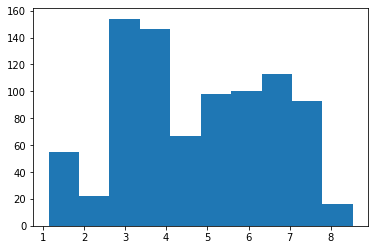

PolTerr


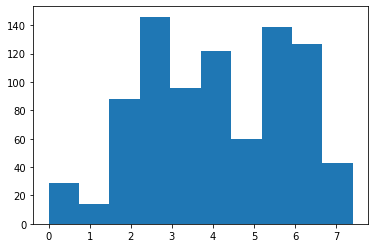

CapPop


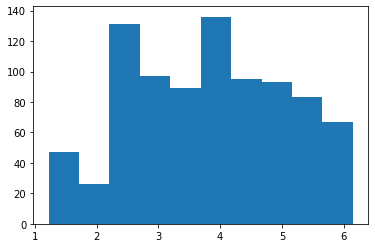

levels


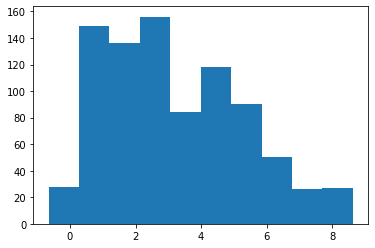

government


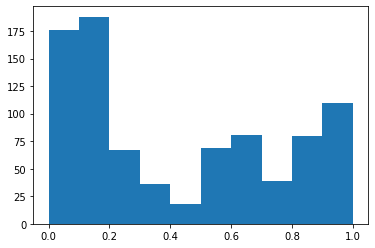

infrastr


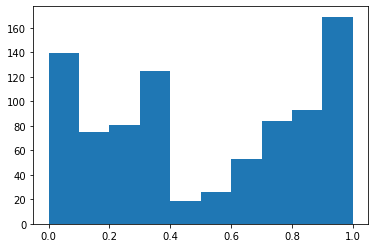

writing


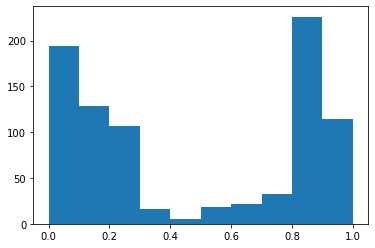

texts


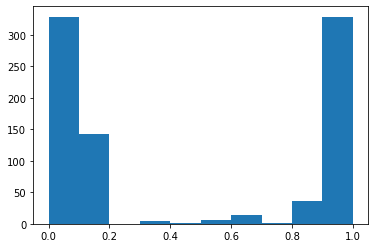

money


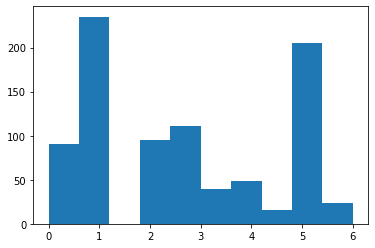

SPC1


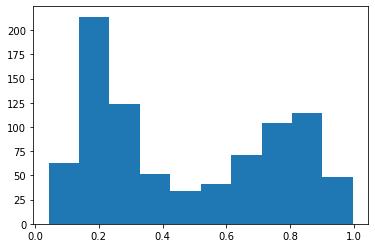

In [68]:
for i in range(3,13):
    print(Data.columns[i])
    plt.hist(Data[Data.columns[i]])
    #plt.set_title(Data.columns[i])
    plt.show()

In [69]:
# Next, we define a relative time scale (RelTime) with 0 at the time when the SPC1 trajectory crosses the 5.3 threshold

In [70]:
NGA = Data["NGA"][0]
print(Data[Data["NGA"] == NGA])

                 NGA    PolID  Time    PolPop   PolTerr    CapPop    levels  \
0  Big Island Hawaii  Hawaii1  1000  3.854914  4.111759  2.282858 -0.653777   
1  Big Island Hawaii  Hawaii1  1100  3.854914  4.111759  2.282858 -0.653777   
2  Big Island Hawaii  Hawaii2  1200  3.750606  3.337475  3.363416  1.060611   
3  Big Island Hawaii  Hawaii2  1300  4.065673  3.337475  3.429545  0.943410   
4  Big Island Hawaii  Hawaii2  1400  4.192464  3.337475  3.584463  1.993130   
5  Big Island Hawaii  Hawaii2  1500  4.599847  3.337475  3.807048  4.564236   
6  Big Island Hawaii  Hawaii2  1600  4.440997  3.337475  2.308375  2.584892   
7  Big Island Hawaii  Hawaii3  1700  5.011752  3.973290  3.442766  3.153204   
8  Big Island Hawaii  USKameh  1800  5.192031  4.226199  4.363033  3.534543   

   government  infrastr   writing  texts  money      SPC1  MG_corr  
0    0.090909  0.100000  0.100000    0.1    1.8  0.203229        0  
1    0.090909  0.100000  0.100000    0.1    1.8  0.203229        0  
2 

In [71]:
NGAlist = list(set(Data["NGA"]))
print(len(NGAlist))
LargeNGAs = []

for NGA in NGAlist:
    Subset = Data[Data["NGA"] == NGA]
    Logical = np.max(Subset["SPC1"]) > SPC_Break # Is this polity large enough to cross the SPC1 threshold?
    print("Is " +NGA+" large enough?",  Logical)
    if Logical:
        LargeNGAs.append(NGA)
    #print(Subset)
print(LargeNGAs)

30
Is Deccan large enough? [ True]
Is Cahokia large enough? [False]
Is North Colombia large enough? [False]
Is Orkhon Valley large enough? [ True]
Is Sogdiana large enough? [ True]
Is Central Java large enough? [ True]
Is Kansai large enough? [ True]
Is Middle Yellow River Valley large enough? [ True]
Is Valley of Oaxaca large enough? [False]
Is Yemeni Coastal Plain large enough? [ True]
Is Iceland large enough? [ True]
Is Paris Basin large enough? [ True]
Is Southern China Hills large enough? [False]
Is Cambodian Basin large enough? [ True]
Is Konya Plain large enough? [ True]
Is Ghanaian Coast large enough? [ True]
Is Latium large enough? [ True]
Is Garo Hills large enough? [False]
Is Chuuk Islands large enough? [False]
Is Niger Inland Delta large enough? [ True]
Is Kachi Plain large enough? [ True]
Is Finger Lakes large enough? [False]
Is Big Island Hawaii large enough? [False]
Is Cuzco large enough? [ True]
Is Kapuasi Basin large enough? [False]
Is Upper Egypt large enough? [ True]

In [72]:
Seshat_Large = Data[Data["NGA"].isin(LargeNGAs)]
print(Seshat_Large)


                      NGA    PolID  Time    PolPop   PolTerr    CapPop  \
33        Cambodian Basin  KhFunaE   300  6.235249  5.409991  3.301030   
34        Cambodian Basin  KhFunaE   400  6.235249  5.409991  3.301030   
35        Cambodian Basin  KhFunaE   500  6.235249  5.409991  3.301030   
36        Cambodian Basin  KhFunaL   600  5.254599  5.421933  3.301030   
37        Cambodian Basin  KhChenl   700  6.393323  5.725095  4.778151   
..                    ...      ...   ...       ...       ...       ...   
859  Yemeni Coastal Plain  YeRasul  1400  5.881658  6.536808  4.698970   
860  Yemeni Coastal Plain  YeTahir  1500  5.454290  5.762184  5.171692   
861  Yemeni Coastal Plain  TrOttm3  1600  7.447158  6.684486  5.819190   
862  Yemeni Coastal Plain  YeQasmi  1700  5.418268  5.553020  3.661252   
863  Yemeni Coastal Plain  YeQasmi  1800  5.418268  5.553020  3.661252   

       levels  government  infrastr   writing     texts  money      SPC1  \
33   2.666667    0.618182  0.977778

## Now for the RelTime


In [73]:
Data_RT = pd.DataFrame(columns = Seshat_Large.columns)
DF_Tzero = pd.DataFrame(columns = ["NGA", "T0"])

# go through the NGAs
for NGA in list(set(Seshat_Large["NGA"])):
    
    # Subset of this NGA's data
    NGA_dat = Seshat_Large[Seshat_Large["NGA"] == NGA]
    # Calculate this NGA's Time Zero
    NGA_TimeZero =NGA_dat["Time"].loc[NGA_dat["SPC1"]> SPC_Break[0]].iloc[0]
    print(NGA,NGA_TimeZero)
    # Shift the Time Scale
    NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
    
    # And combine it to a new Data Frame
    Data_RT = pd.concat([Data_RT, NGA_dat])
    DF_Tzero = pd.concat([DF_Tzero, pd.DataFrame(data={"NGA": [NGA], "T0": [NGA_TimeZero]})])
    print(NGA_dat[["Time", "SPC1"]])
    print(" ________________________ ")

Konya Plain -2000
     Time      SPC1
248 -7600  0.105089
249 -7500  0.105089
250 -7400  0.105089
251 -7300  0.105089
252 -7200  0.105089
..    ...       ...
353  3400  0.808596
354  3500  0.886274
355  3600  0.958307
356  3700  0.957502
357  3800  0.947797

[110 rows x 2 columns]
 ________________________ 
Ghanaian Coast 1800
     Time      SPC1
122  -200  0.419548
123  -100  0.419548
124     0  0.623384
 ________________________ 
Cuzco 1400
    Time      SPC1
61 -1300  0.257786
62 -1200  0.219698
63 -1100  0.212864
64 -1000  0.224014
65  -900  0.215498
66  -800  0.215498
67  -700  0.486610
68  -600  0.486610
69  -500  0.486610
70  -400  0.296283
71  -300  0.296283
72  -200  0.296283
73  -100  0.374145
74     0  0.594646
75   100  0.602291
 ________________________ 
Middle Yellow River Valley -1800
     Time      SPC1
420 -3200  0.224902
421 -3100  0.224902
422 -3000  0.224902
423 -2900  0.224902
424 -2800  0.224902
..    ...       ...
485  3300  0.916773
486  3400  0.930700
487  3500

C:\Users\Tobias\AppData\Local\Temp/ipykernel_15236/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_15236/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_15236/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,


 ________________________ 
Niger Inland Delta 1000
     Time      SPC1
490 -1200  0.098110
491 -1100  0.098110
492 -1000  0.098110
493  -900  0.201994
494  -800  0.201994
495  -700  0.201994
496  -600  0.302212
497  -500  0.302212
498  -400  0.302212
499  -300  0.302212
500  -200  0.302212
501  -100  0.378760
502     0  0.552919
503   100  0.707378
504   200  0.707378
505   300  0.718475
506   400  0.720930
507   500  0.767729
508   600  0.816770
509   700  0.816770
510   800  0.751563
 ________________________ 
Cambodian Basin 300
    Time      SPC1
33     0  0.673646
34   100  0.673646
35   200  0.673646
36   300  0.664762
37   400  0.753940
38   500  0.783000
39   600  0.844609
40   700  0.828656
41   800  0.840909
42   900  0.840909
43  1000  0.812885
44  1100  0.812885
45  1200  0.810691
46  1300  0.806051
47  1400  0.806733
48  1500  0.797299
 ________________________ 
Kachi Plain -2500
     Time      SPC1
129 -5000  0.157368
130 -4900  0.157368
131 -4800  0.157368
132 -4700  0.

C:\Users\Tobias\AppData\Local\Temp/ipykernel_15236/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_15236/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NGA_dat["Time"] = NGA_dat["Time"]-NGA_TimeZero
C:\Users\Tobias\AppData\Local\Temp/ipykernel_15236/2792927886.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [74]:
DF_Tzero.set_index("NGA", inplace=True)
DF_Tzero.transpose().to_csv("TimeZero.csv")
DF_Tzero.transpose()

NGA,Konya Plain,Ghanaian Coast,Cuzco,Middle Yellow River Valley,Yemeni Coastal Plain,Deccan,Latium,Upper Egypt,Susiana,Iceland,Orkhon Valley,Sogdiana,Paris Basin,Niger Inland Delta,Cambodian Basin,Kachi Plain,Central Java,Kansai
T0,-2000,1800,1400,-1800,400,-300,-700,-3100,-3700,1300,500,-500,-200,1000,300,-2500,800,400


In [75]:
Data_RT.rename(columns={'Time':'RelTime'}, inplace=True)
Data_RT

,NGA,PolID,RelTime,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money,SPC1,MG_corr
248,Konya Plain,TrNeoER,-7600,3.293724,4.138263,1.442118,-0.055817,0.000000,0.000000,0.000000,0.0000,0.0,0.105089,0
249,Konya Plain,TrNeoER,-7500,3.293724,4.138263,1.442118,-0.055817,0.000000,0.000000,0.000000,0.0000,0.0,0.105089,0
250,Konya Plain,TrNeoER,-7400,3.293724,4.138263,1.442118,-0.055817,0.000000,0.000000,0.000000,0.0000,0.0,0.105089,0
251,Konya Plain,TrNeoER,-7300,3.293724,4.138263,1.442118,-0.055817,0.000000,0.000000,0.000000,0.0000,0.0,0.105089,0
252,Konya Plain,TrNeoER,-7200,3.293724,4.138263,1.442118,-0.055817,0.000000,0.000000,0.000000,0.0000,0.0,0.105089,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,Kansai,JpAshik,1000,7.096910,5.469822,5.176091,5.909872,0.690000,0.916667,1.000000,0.9875,4.0,0.819800,1
241,Kansai,JpSengk,1100,7.230449,4.176091,4.602060,5.083771,0.490000,0.840000,0.985714,0.9250,5.0,0.746661,1
242,Kansai,JpAzMom,1200,7.397940,5.469822,5.000000,5.244956,0.710000,0.925000,0.983333,0.9875,5.0,0.824980,1
243,Kansai,JpTokgw,1300,7.462398,5.469822,6.113943,6.534359,0.857143,1.000000,1.000000,1.0000,6.0,0.923083,1


## Comparison

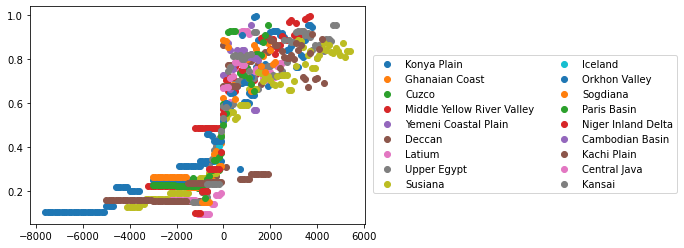

In [76]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.scatter(DF["RelTime"], DF["SPC1"], label=N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

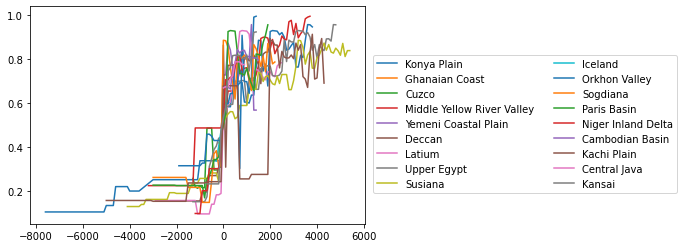

In [77]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"], DF["SPC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

## Fitting

Fit logistic model to the data set. Then, try cross-valdiation by fitting on some time series and predicting the others.

In [78]:
X, y = Data_RT["RelTime"].to_numpy(), Data_RT["SPC1"].to_numpy()
T = 5000
X = np.array(list(X)) # for some reason, this transformation is necessary
X = X/T # normalisation of the data

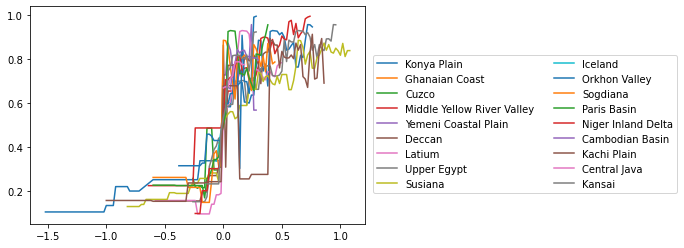

In [79]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"]/T,    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.show()

In [80]:
def f(x, a, b, c, d):
    # the logistic function in its most general shape
    return a / (1. + np.exp(-c * (x - d))) + b

The parameter c (or rather 1/c) corresponds to a time scale of the temporal evolution.

In [81]:
(a_, b_, c_, d_), _ = opt.curve_fit(f, X, y)

p0 = np.array((a_, b_, c_, d_))
print(p0)

[ 5.91641014e-01  1.93784863e-01  1.93749264e+01 -1.54321408e-02]


In [82]:
print(a_, b_, c_, d_)
x_show = np.arange(min(X), max(X)+1000/T,100/T) # evaluate the estimated function here
print(min(x_show), max(x_show))
y_hat = f(x_show, a_, b_, c_, d_)

0.591641013623466 0.19378486259992567 19.37492640647066 -0.015432140843941868
-1.52 1.2600000000000025


In [83]:
print(p0)


[ 5.91641014e-01  1.93784863e-01  1.93749264e+01 -1.54321408e-02]


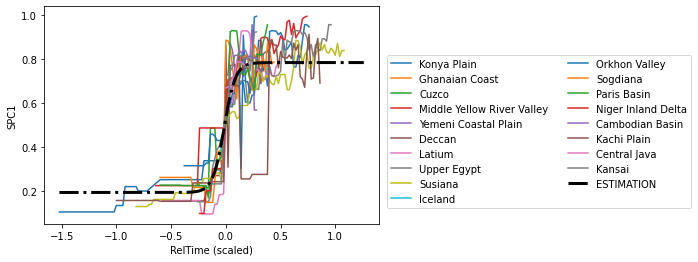

In [84]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"]/T,    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
    
plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.xlabel("RelTime (scaled)")
plt.ylabel("SPC1")
plt.show()

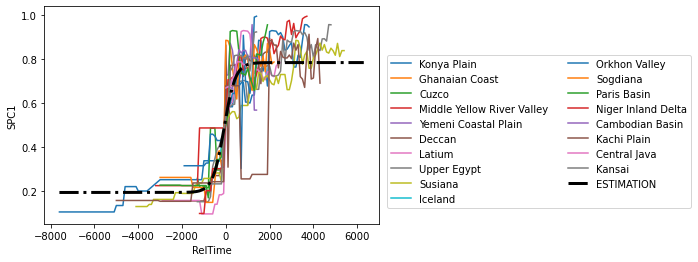

In [93]:
for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"],    # ALSO normalised
             DF["SPC1"], label=N)
    #print(N)
    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("SPC1")
plt.xlabel("RelTime")
plt.show()

#### Residuals

In [89]:
y_est = f(X,a_, b_, c_, d_)
y_est_Residuals = y_est
y_Residuals = y

In [90]:
RMSE = (np.sum((y_est_Residuals-y_Residuals)**2) / len(y)  )**0.5
print(RMSE)

0.11299071583116063


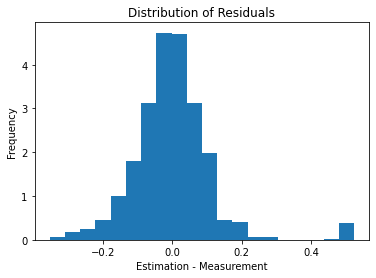

In [91]:
plt.hist(y_est_Residuals-y_Residuals,bins = 20, density = True)
plt.title("Distribution of Residuals")
plt.xlabel("Estimation - Measurement")
plt.ylabel("Frequency")
plt.show()

In [132]:
len(N)

6

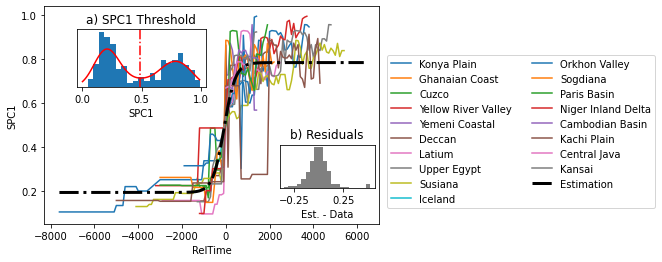

In [134]:
fig, ax1 = plt.subplots()
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.2, 0.6, 0.3, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])

left, bottom, width, height = [0.67, 0.25, 0.22, 0.15]
ax3 = fig.add_axes([left, bottom, width, height])

for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    name = N
    # some abbreviations
    if N=="Middle Yellow River Valley":
        name = "Yellow River Valley"
    if N == "Yemeni Coastal Plain":
        name = "Yemeni Coastal"
        
    ax1.plot(DF["RelTime"],    
             DF["SPC1"], label=name)
    #print(N)
    
ax1.plot(x_show*T, y_hat, "-.",label="Estimation", c = "k", linewidth=3)
lgd = ax1.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
ax1.set_ylabel("SPC1")
ax1.set_xlabel("RelTime")


ax2.hist(Data["SPC1"], bins = 20, density = True)
x = np.arange(0,1,0.01)
KDE = gaussian_kde(Data["SPC1"])(x)
KDE_min = np.min(KDE[20:80])  # find the minimum in the centre
xmin = x[KDE == KDE_min] # x-position of the minimum
ax2.plot(x, KDE, c="red")
ax2.axvline(xmin, linestyle="-.",c="red", )
ax2.set_title("a) SPC1 Threshold")
ax2.set_xlabel("SPC1")
ax2.axes.get_yaxis().set_visible(False)


ax3.set_title("b) Residuals")
ax3.hist(y_est_Residuals-y_Residuals,color="grey",bins = 20, density = True)
ax3.set_xlabel("Est. - Data")
ax3.set_xticks(np.arange(-0.25,0.26,0.5))
ax3.axes.get_yaxis().set_visible(False)

plt.savefig("Logistic_Residuals_RelTime.pdf",bbox_extra_artists=(lgd,),dpi=300,bbox_inches='tight')
plt.show()

## Out-of-Sample prediction

In [28]:
L = len(Data_RT["RelTime"].to_numpy())


In [29]:
def RhoSq(y_hat, y_true):
    y_mean = np.mean(y_true)
    return(1 - sum((y_hat-y_true)**2)/sum((y_mean-y_true)**2)  )

In [30]:
X1, y1 = Data_RT["RelTime"].to_numpy(), Data_RT["SPC1"].to_numpy()
T = 5000
X1 = np.array(list(X1)) # for some reason, this transformation is necessary
X1 = X1/T # normalisation of the data

for i in range(5):
    
    Selection = np.random.choice(np.arange(L), size = int(L/2), replace = False)
    
    X_train = X1[Selection]
    y_train = y1[Selection]
    
    test_indx = np.ones(len(X1), bool)
    test_indx[Selection]=0
    y_test = y1[test_indx]
    X_test = X1[test_indx]
    
    (a1_, b1_, c1_, d1_), _ = opt.curve_fit(f, X_train, y_train)
    print((a1_, b1_, c1_, d1_))
    print(RhoSq( f(X_test, a1_, b1_, c1_, d1_), y_test))
    

(0.604102004010675, 0.1916881833583697, 14.362083608079756, -0.009575318022566628)
0.8596435565058268
(0.5746838353308725, 0.1991511975562523, 25.009764951239383, -0.012022728310383967)
0.8595318973920407
(0.5732106748547194, 0.2023997388959749, 32.1475853093069, -0.008015755701422647)
0.8327588026422343
(0.5955983922844128, 0.19340271845274815, 20.349132789348353, -0.015396478509599562)
0.833472736158796
(0.5883473995068195, 0.18689467819273223, 16.93208288189239, -0.015116840060993847)
0.8632387354745851


In [31]:
opt.curve_fit(f, X_train, y_train)[0]

array([ 5.88347400e-01,  1.86894678e-01,  1.69320829e+01, -1.51168401e-02])

#### Bootstrapping

Will lead to some uncertainty values for our parameters. Hence, we might want to throw away some of them as a possible zero-value (prime candidate for this is the parameter d). The bootstrapped uncertainty for c will tell us more about the range of possible time scales for the temporal evolution and, by judging the width of this uncertainty, if there is a universal time scale.

In [32]:
Data_Reduced = Data_RT[["NGA", "RelTime", "SPC1"]]
NGA_red = list(set(Data_RT["NGA"]))


In [33]:
import random
random.seed(1234)
nBT = 1000 # how many Bootstraps
negCcount = 0

Params = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    NGA_selection = random.choices(NGA_red,k=len(NGA_red))
    Data_Bootstrap = pd.DataFrame(columns = Data_Reduced.columns)

    for n in NGA_selection:
        Data_Bootstrap = pd.concat([Data_Bootstrap, Data_Reduced[Data_Reduced["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["SPC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0

    Params = pd.concat([Params,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_]})])
    if c_ < 0:
        print(NGA_selection)
        negCcount +=1
        for N in NGA_selection:
            DF = Data_RT[Data_RT["NGA"] == N]
            plt.plot(DF["RelTime"]/T,    # ALSO normalised
            DF["SPC1"], label=N)
            plt.plot(x_show, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3) # FOR FULL DATA
            plt.plot(x_show, f(x_show, a_, b_, c_, d_), "-.",c="r", linewidth = 3)

        plt.show()
        
    print(a_, b_, c_, d_)
    print("-----------------")
print(Params.round(2))

0.6215319609480584 0.20078245674819334 17.37659661420244 -0.01209203900846772
-----------------
0.6053522366522711 0.18252905778819642 12.667743265145962 -0.013112216446043658
-----------------
0.6668660834929965 0.16684689124270816 10.282071863966204 -0.004540910554077019
-----------------
0.5939549318769877 0.17669400905698068 19.674912061628564 -0.010319608867729903
-----------------
0.5888220947590224 0.21305128825647793 23.959821823334554 -0.013994640259915831
-----------------
0.5976841753526762 0.18191507556399936 20.36532919595916 -0.018353277274520907
-----------------
0.638013982785085 0.17023861227699286 9.737579726699527 -0.009478652254331246
-----------------
0.6003715205380754 0.19940506104877959 18.964813664059566 -0.013045418697737595
-----------------
0.5436154774994199 0.18890537472454622 36.68008962063741 -0.018012439019194856
-----------------
0.6386764164161323 0.16611615996969878 11.411390235013053 -0.0038366951900853214
-----------------
0.5730737225882475 0.2232

0.6083577051422339 0.21560246228342048 15.829643156352752 -0.007110034821192026
-----------------
0.5076605554696006 0.19756864097213236 31.84548082415215 -0.027704950515196045
-----------------
0.6226767205439749 0.18337082021665788 29.29104384930232 -0.00530499035974166
-----------------
0.5748818015381126 0.1874124757164142 28.242840825527747 -0.012101787154882268
-----------------
0.6234319553505673 0.18320581175246134 16.80129053507172 -0.0053861843178724085
-----------------
0.5847122258853188 0.20640422566934002 24.49521033131311 -0.009135002251954764
-----------------
0.5325630070473876 0.1986706539237931 35.77079226763961 -0.020816621487258283
-----------------
0.5794596760769898 0.1938051617795202 28.971187981044523 -0.014022011954439596
-----------------
0.5698965307465543 0.19129911639513683 35.27369638565398 -0.013941326670409246
-----------------
0.5629677321633026 0.19995035581964296 29.0724636893494 -0.01649993165735292
-----------------
0.5950028289652164 0.22438174853

0.6355588283378752 0.19572664062344067 14.673365714741083 -0.008882160333580831
-----------------
0.5263475521409249 0.2109369538434335 32.893595651136586 -0.01884352812516006
-----------------
0.5904082476017865 0.18337993528984933 18.57958095993178 -0.01381690307292568
-----------------
0.6270236808361572 0.17458169788111755 13.68179448761964 -0.008870093622553083
-----------------
0.5843023531955182 0.19670575772406051 34.482798351851024 -0.01025896883537649
-----------------
0.6367006041240395 0.1586410325708139 9.976314048584126 -0.011357915822199775
-----------------
0.6435851737693198 0.1629558666417599 10.039575557668702 -0.017480686782710128
-----------------
0.5533461785275475 0.19438381705984334 32.869697256250404 -0.017498899624909515
-----------------
0.5681320633751875 0.22547671852049556 31.640543593631097 -0.012951188527282286
-----------------
0.5455009771417865 0.20066603905551822 43.45622801304563 -0.016435668227397428
-----------------
0.591269584032941 0.2057162043

0.5740544255209235 0.1921239592132664 32.13972783835473 -0.016833509232312128
-----------------
0.5849492543490179 0.19375844100429018 15.834925673151659 -0.03367629104031538
-----------------
0.5884434219536052 0.20553549984210587 25.478179089743197 -0.009579000256684409
-----------------
0.5919070199700539 0.21071133134263978 28.492140700549147 -0.015591872197071867
-----------------
0.6604820119604525 0.16553473858571036 9.431545938926648 -0.013154309873032339
-----------------
0.6308891551331653 0.1917719445927227 17.422808221245432 -0.010739394324293307
-----------------
0.6677945329192048 0.1617207378930779 8.550783475143191 0.003816948996324296
-----------------
0.5608778619049152 0.1934152750996264 30.31876759801557 -0.015225902430152417
-----------------
0.566780668247736 0.20882332238258122 31.51150716644648 -0.023054328741491742
-----------------
0.5986834295927352 0.2138719204516962 28.14814748363777 -0.013192834097638873
-----------------
0.6189845807591315 0.2015469532912

0.7038477117216272 0.14395855284915243 6.634068726556156 0.005085207842110873
-----------------
0.628020791512791 0.19554352739751846 15.125673969841664 -0.009670960897950963
-----------------
0.5964072896183511 0.1830629711239195 17.821906200304937 -0.019617617171998503
-----------------
0.6421993440881083 0.19304538847378375 10.7236790713258 -0.0054557663141563024
-----------------
0.5332246846971687 0.20609423568477903 30.425114923624356 -0.020902656098389434
-----------------
0.5845858374258076 0.1901130482816072 28.121779620219336 -0.02017579678154752
-----------------
0.6460373880667573 0.15512073743233143 8.451931398417557 -0.018853411104930648
-----------------
0.6225043438487837 0.1824704580762991 18.843258281187545 -0.012471234262904042
-----------------
0.6120471382430256 0.18603006482574863 24.604476462471876 -0.009738011407853141
-----------------
0.6170903308705573 0.20001833600916785 14.438170910954657 -0.003433886318502809
-----------------
0.6590146959528109 0.19048159

0.6461062442036619 0.16018107129630854 8.716598172174137 0.0003968511052856486
-----------------
0.5641283877715689 0.2002989081664574 44.42908111019003 -0.015912805547999016
-----------------
0.5932860228849193 0.1973881294295033 20.10000444880904 -0.01585666818161665
-----------------
0.6351343583276099 0.17502828933458528 9.99612638558007 -0.01907679124173736
-----------------
0.5507510835011428 0.1896923959701522 48.6498864129287 -0.010998629241836155
-----------------
0.6036381765399731 0.17556719861048817 18.08949284685637 -0.011265220385554673
-----------------
0.5373526364120415 0.20536721612434441 34.778246471911565 -0.022073290121856166
-----------------
0.6096048124630751 0.1958982024971729 19.95269701230701 -0.017021556386308777
-----------------
0.5504609031430355 0.1876892554929251 27.34487471250666 -0.016539066076196006
-----------------
0.6305833845031142 0.20307670342812806 16.526490746111158 -0.004580177371716453
-----------------
0.6217009291138144 0.1619070349833120

0.561953605855268 0.218924753760769 25.507732754482287 -0.011821853151485331
-----------------
0.6663094302682472 0.16768369500929461 9.588230352071813 -0.024305219825232906
-----------------
0.5972488823009773 0.19393795108177747 26.969999471424266 -0.01886362682556311
-----------------
0.5786557591130231 0.21435685382756742 37.14783327128604 -0.013000988059683406
-----------------
0.570523702617521 0.1920207586150924 34.708456314102364 -0.017338849381562767
-----------------
0.5683219848817177 0.17926687152925158 34.094231023544125 -0.017908583573700055
-----------------
0.6308803326393373 0.17721573096770146 14.687075263871371 -0.00940190581105017
-----------------
0.5818139011597322 0.19014003588668396 24.994163920321782 -0.018626688350909762
-----------------
0.5593788831309852 0.18924356814446178 32.99646223667104 -0.019782511170284595
-----------------
0.6317637421553592 0.1999215490622004 13.301618744913883 -0.009166629325793745
-----------------
0.619889395340233 0.17291443758

0.6123060805831023 0.17493324372109206 14.718517899461792 -0.007060321831497712
-----------------
0.5838200001853167 0.19893517213819384 38.49241698692627 -0.011856462693954066
-----------------
0.5986763496190273 0.1848434523690718 22.091755349114152 -0.012391239583786871
-----------------
0.6025331826528568 0.21399187669360675 21.00645265072389 -0.01110281131591324
-----------------
0.6067475816351855 0.19671208925342057 15.514862340268744 -0.017630323113151155
-----------------
0.6545192533429288 0.14111250269551742 6.611123455558371 0.0019883642257869935
-----------------
0.682578544518277 0.17611027594373493 8.068134514220077 -0.013058658976493423
-----------------
0.5643012205072917 0.2028207734886008 37.21525794315325 -0.01525244331354238
-----------------
0.5682700010902386 0.18091388195625077 18.75975252372071 -0.018839421487215437
-----------------
0.5872658680497005 0.1940404752483882 18.35247590776944 -0.016544214878825455
-----------------
0.5755304694454773 0.212008844486

0.5406479522496302 0.19546584774420697 36.17124646563614 -0.015860927284616914
-----------------
0.5528338452991594 0.18707591219329162 42.329801248046984 -0.014889700228122223
-----------------
0.5228143861316761 0.22563792399566202 30.662068287443848 -0.012195972243577642
-----------------
0.6196664130144998 0.17723559646709267 14.397482420759626 -0.021836278125913103
-----------------
0.5883673320231788 0.23467838075590647 26.30370839899508 -0.007186208970998361
-----------------
0.6843620127326023 0.15994177728742745 10.648172873169663 -0.0011697891939282366
-----------------
0.6699851967287993 0.1563591238159895 7.557142279944525 0.0008982030210877764
-----------------
0.629148327392477 0.17484744766727492 16.371677797230724 -0.013419082136213099
-----------------
0.5713385792121968 0.20835887658406366 21.45188741118613 -0.017716347942063063
-----------------
0.6003876639446383 0.22350940011595058 15.798962627782046 -0.007843783632476987
-----------------
0.5556314463001524 0.1879

0.6383425512224377 0.17479431988415592 12.431882540603839 -0.018651779740543776
-----------------
0.5737490301120304 0.17459615963748124 23.214515038225947 -0.016992539382077947
-----------------
0.5988426820096141 0.19374195765653837 17.210830280822318 -0.011142550362796572
-----------------
0.5945878562493152 0.1876382376083102 20.27446320466755 -0.01495464546110721
-----------------
0.6160647183574045 0.18615497369273826 14.393702642818042 -0.008503545221118026
-----------------
0.5515190320171391 0.20126604116740507 36.6562899746626 -0.01687619448993135
-----------------
0.6383773224070611 0.16570770618485914 9.371998560787937 -0.026460899181496744
-----------------
0.5652196965216991 0.21982258434908672 28.53325230986834 -0.012290114994111595
-----------------
0.6873378252101432 0.16882472253358166 9.25461605500437 -0.005334007887721256
-----------------
0.6474838190474208 0.19474305881017343 11.187586601459978 -0.005835595141756418
-----------------
0.6075465617816945 0.173342250

0.6269006217394562 0.1704101594033927 12.405119808778863 -0.0004028770969527585
-----------------
0.5494375941863653 0.227115491649086 39.0571442067091 -0.015141612441248778
-----------------
0.5917701026699391 0.18099671360221462 20.422456660219492 -0.015589376261230458
-----------------
0.6361164743575582 0.19557715693412858 12.091711437706754 -0.00436800044818312
-----------------
0.5548119104435919 0.21799316487701645 39.83217382491268 -0.010464570200895943
-----------------
0.6470774440282606 0.18364496406082734 12.866098857346387 -0.013957606425754932
-----------------
0.6003813997039976 0.1726164666236148 16.189239792115238 -0.00813909730783571
-----------------
0.5854124049988744 0.18642097007387765 26.002959906454663 -0.015599336166552291
-----------------
0.6576114560110126 0.15993594100985592 8.329174494363311 -0.0002869954038974613
-----------------
0.5631846539383518 0.1768430637011243 22.25879970653973 -0.01606498036303507
-----------------
0.6832823741122321 0.1764979640

0.5763396632025417 0.18746267240979567 30.87505621346968 -0.016451248266563624
-----------------
0.5557263373109743 0.2024908729651721 21.66556297142483 -0.021093645677887223
-----------------
0.575634474392427 0.21621451044414414 42.294364780598876 -0.008431836326915316
-----------------
0.5890464090951357 0.21059158057452934 24.80366126252565 -0.019619199088151084
-----------------
0.664653155438958 0.18322893659284384 9.723221472108618 -0.008617431975960514
-----------------
0.5823886850446435 0.19831117684189778 23.20859878984251 -0.014689335867091475
-----------------
0.6646435311362308 0.16859481661183978 8.51167504272159 -0.022369593078175536
-----------------
0.5930483409776394 0.20297585906606422 29.713805425554273 -0.008565420552754397
-----------------
0.5503538230591442 0.20882903894831384 28.519307494182193 -0.016133004379537005
-----------------
0.585223153522104 0.18049595287404044 40.08796909888548 -0.005215201849609117
-----------------
0.5757293782194935 0.19175564496

Original estimates:
    
0.59  0.19  19.37  -0.01 

a / (1. + np.exp(-c * (x - d))) + b

In [34]:
print(negCcount)

0


In [35]:
Params.columns

Index(['a', 'b', 'c', 'd'], dtype='object')

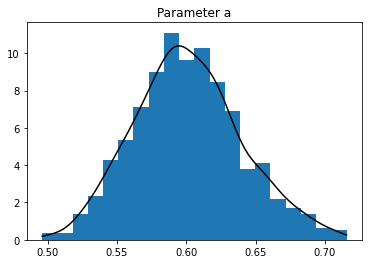

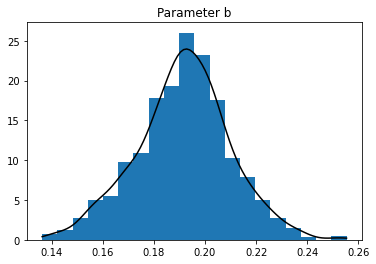

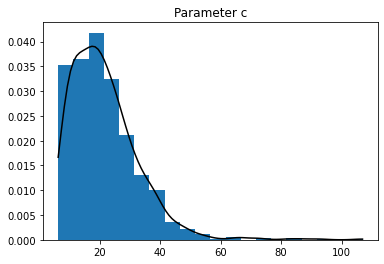

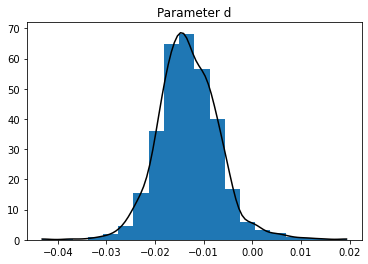

In [36]:
for P in Params.columns:
    
    
    Ps = Params[P]
    P_range = np.linspace(min(Ps), max(Ps),100)
    KDE = gaussian_kde(Ps)(P_range)
    
    plt.hist(Ps,bins=20, density= True)
    plt.plot(P_range, KDE, c="k")
    plt.title("Parameter "+str(P))
    plt.show()

Negative values for c are prevented by setting an initial parameter guess. Otherwise, one can have results with negative C<0 and also A<0 (A, B, C, D) instead of (a,b,c,d) with c>0. Then, via asymptotic behaviour at +/- infinity:

a + b = B
b = A + B

which implies

a = -A

### Analysis of the Curve

When does f(x) = y_est actually change? 
f(-infinity) = b and f(infinity) = a + b. We can now calculate the standard deviations of b and a+b via the bootstrap estimations and check when y_est exceeds b + sd(b) and reaches a+b - sd(a+b).

In [37]:
print(np.mean(Params["b"]), np.std(Params["b"]))
print(np.mean(Params["b"]+Params["a"]), np.std(Params["b"]+Params["a"]))

Thresh1 = np.mean(Params["b"]) + np.std(Params["b"])
Thresh2 = np.mean(Params["b"]+Params["a"]) - np.std(Params["b"]+Params["a"])
print(Thresh1, Thresh2)
print(min(y_est), max(y_est))

0.19149240947999532 0.018281981944025506
0.7927182236735593 0.029695388653582448
0.20977439142402082 0.7630228350199768
0.1937848626000551 0.7854258758647769


In [38]:
def f1(x):
    # first threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh1)

T1 = opt.root(f1, -0.5)

In [39]:
def f2(x):
    # second threshold
    return(f(x, p0[0], p0[1], p0[2], p0[3])-Thresh2)

T2 = opt.root(f2, 0.5)

C:\Users\Tobias\AppData\Local\Temp/ipykernel_15236/465986300.py:3: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


In [40]:
Timeframe = (T2["x"] -T1["x"])[0]
t_2, t_1 = T2["x"], T1["x"]
# scale this back to original time
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*Timeframe), "years.")

Most of the cultural evolution takes place in a time interval of  1760.0 years.


In [41]:
# 1748
# 1804

## Bootstrapping the Time Interval

Now we can repeat this task, but 

1) check if we actually need the parameter d

2) Calculate the time thresholds T1/T2 for every single Bootstrapped Data and therefore calculate a time interval with standard deviation

##### Testing d

In [42]:
print(np.quantile(Params["d"],0.975))


0.00029803951299537887


In [43]:
from statsmodels.stats.weightstats import ztest

ztest(Params["d"], x2=None, value=0, alternative="smaller")
# almost surely not 0, so we keep d

(-66.19259117517505, 0.0)

##### Bootstrap for the Time Interval

In [44]:
def fBT1(x):
    # first threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh1)

def fBT2(x):
    # second threshold for the Bootstrapping
    return(f(x, a_, b_, c_, d_)-Thresh2)


In [45]:
random.seed(1234)
nBT = 1000 # how many Bootstraps
Successes = 0

Params2 = pd.DataFrame(columns = ["a", "b", "c", "d"]) # df of the parameters

for i in range(nBT):
    
    # Select the random NGAs
    NGA_selection = random.choices(NGA_red,k=len(NGA_red))
    Data_Bootstrap = pd.DataFrame(columns = Data_Reduced.columns)

    for n in NGA_selection: # combine them to a data frame
        Data_Bootstrap = pd.concat([Data_Bootstrap, Data_Reduced[Data_Reduced["NGA"]==n]])
    
    
    X, y = Data_Bootstrap["RelTime"].to_numpy(), Data_Bootstrap["SPC1"].to_numpy()

    X = np.array(list(X)) # for some reason, this transformation is necessary
    X = X/T # normalisation of the data
    (a_, b_, c_, d_), _ = opt.curve_fit(f, X, y, p0) # p0: Initial guess = Full Estimation
                                                     # Otherwise: direction can reverse with c<0
    
    # Time Intervals
    T1 = opt.root(fBT1, t_1)
    T2 = opt.root(fBT2, t_2)
    
    # only add results, if opt.root is successful:
    if T1["success"] and T2["success"]:
        Successes += 1
        Params2 = pd.concat([Params2,
                       pd.DataFrame(data={"a":[a_], "b":[b_], "c":[c_], "d":[d_], "T1":T1["x"], "T2":T2["x"]})])    
        print(a_, b_, c_, d_, T1, T2)
        print("-----------------")


0.6215319609480584 0.20078245674819334 17.37659661420244 -0.01209203900846772     fjac: array([[-1.]])
     fun: array([1.38777878e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.50418305e-11])
       r: array([-0.15398932])
  status: 1
 success: True
       x: array([-0.25502144])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.26121336e-13])
       r: array([-0.93200084])
  status: 1
 success: True
       x: array([0.11736151])
-----------------
0.6053522366522711 0.18252905778819642 12.667743265145962 -0.013112216446043658     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-6.95554725e-14])
       r: array([-0.32960319])
  status: 1
 success: True
       x: array([-0.25426618])     fjac: array([[-1.]])
     fun: array([-8.8817842e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.52093782e-10])
       r: array

       x: array([0.07337655])
-----------------
0.6064934817853819 0.2008390138448098 21.02967565988852 -0.010445505807466508     fjac: array([[-1.]])
     fun: array([1.30451205e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-1.47457463e-10])
       r: array([-0.1851413])
  status: 1
 success: True
       x: array([-0.210298])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([2.10942375e-14])
       r: array([-0.86374027])
  status: 1
 success: True
       x: array([0.11036597])
-----------------
0.634295449903556 0.16673998969304676 9.337891090694752 -0.0432348476123617     fjac: array([[-1.]])
     fun: array([7.21644966e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.79367882e-10])
       r: array([-0.37458812])
  status: 1
 success: True
       x: array([-0.32383973])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf

0.6114201493559345 0.19670241376000425 13.1607185175867 -0.008699912954517244     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-3.98597821e-13])
       r: array([-0.16835856])
  status: 1
 success: True
       x: array([-0.29923891])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([6.3236083e-12])
       r: array([-0.54976392])
  status: 1
 success: True
       x: array([0.1835604])
-----------------
0.5962953258917885 0.16828238482509336 14.219603359599933 -0.019369639393143467     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-3.26996763e-12])
       r: array([-0.54894623])
  status: 1
 success: True
       x: array([-0.20173147])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([3.98892031e-12])
       r: array([-0.02205213

0.5726349021487064 0.2076377165193585 21.018124148074897 -0.01329021850698463     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.80411242e-15])
       r: array([-0.04474134])
  status: 1
 success: True
       x: array([-0.27912076])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([1.80966353e-14])
       r: array([-0.35163658])
  status: 1
 success: True
       x: array([0.15189399])
-----------------
0.6537990257355418 0.15188427974668267 7.3299682038636975 0.0007500689066766835     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-6.34770014e-13])
       r: array([-0.38676052])
  status: 1
 success: True
       x: array([-0.31733334])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([7.45625783e-13])
       r: array([-0.292296

       x: array([-0.11172658])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-2.5099367e-11])
       r: array([-1.17316194])
  status: 1
 success: True
       x: array([0.08348165])
-----------------
0.6234319553505673 0.18320581175246134 16.80129053507172 -0.0053861843178724085     fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-7.16758319e-11])
       r: array([-0.42736175])
  status: 1
 success: True
       x: array([-0.19060761])     fjac: array([[-1.]])
     fun: array([-4.10782519e-15])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-4.22511803e-10])
       r: array([-0.68151511])
  status: 1
 success: True
       x: array([0.14860871])
-----------------
0.5847122258853188 0.20640422566934002 24.49521033131311 -0.009135002251954764     fjac: array([[-1.]])
     fun: array([5.55111512e-17])
 message: 'The solutio

       x: array([-0.22255614])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([5.3040905e-12])
       r: array([-0.44361017])
  status: 1
 success: True
       x: array([0.15861363])
-----------------
0.588972067162483 0.19038737829709101 25.217870815278715 -0.008474803113678795     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([4.3373638e-13])
       r: array([-0.47280617])
  status: 1
 success: True
       x: array([-0.14251882])     fjac: array([[-1.]])
     fun: array([4.6629367e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-3.67124109e-10])
       r: array([-0.40055244])
  status: 1
 success: True
       x: array([0.13256965])
-----------------
0.6081978573682124 0.18952190378037773 20.878931935087582 -0.008358413965782713     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
    

       x: array([-0.14717865])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.44249065e-15])
       r: array([-0.13452897])
  status: 1
 success: True
       x: array([0.15993077])
-----------------
0.6184070916102107 0.17180840206937206 27.449390235833366 -0.006924511416226672     fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([6.39536757e-11])
       r: array([-0.97816588])
  status: 1
 success: True
       x: array([-0.10627454])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-1.04249942e-13])
       r: array([-0.71360021])
  status: 1
 success: True
       x: array([0.105254])
-----------------
0.6951041762266655 0.1692239794857884 7.671490479236772 -0.006286958007983932     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10


C:\Users\Tobias\AppData\Local\Temp/ipykernel_15236/465986300.py:3: RuntimeWarning: overflow encountered in exp
  return a / (1. + np.exp(-c * (x - d))) + b


     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([2.14273044e-14])
       r: array([-0.7582649])
  status: 1
 success: True
       x: array([0.17910839])
-----------------
0.5615749748719111 0.20243180176750458 28.551340736087326 -0.013926768971210368     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([2.10109707e-14])
       r: array([-0.20689972])
  status: 1
 success: True
       x: array([-0.16536948])     fjac: array([[-1.]])
     fun: array([-4.4408921e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([3.37976314e-11])
       r: array([-0.02804408])
  status: 1
 success: True
       x: array([0.20831079])
-----------------
0.601855723072085 0.184744666010613 19.110993995351564 -0.010604379464908484     fjac: array([[-1.]])
     fun: array([-6.77236045e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([5.49419815e-10])

0.5749601081141097 0.1997696370322639 36.73708031073837 -0.012118531093700752     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 18
     qtf: array([1.40443213e-14])
       r: array([-0.36114987])
  status: 1
 success: True
       x: array([-0.1219173])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([-8.44568859e-12])
       r: array([-0.42132021])
  status: 1
 success: True
       x: array([0.09332126])
-----------------
0.6264308914889996 0.19277222799473093 13.862136889590147 -0.013652457779130087     fjac: array([[-1.]])
     fun: array([3.05311332e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-6.93587965e-11])
       r: array([-0.22929042])
  status: 1
 success: True
       x: array([-0.27185085])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([2.24456009e-11])
 

0.6241621502467585 0.17854638245817805 12.19236727643276 -0.02335088506851519     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-7.23199278e-13])
       r: array([-0.36169411])
  status: 1
 success: True
       x: array([-0.26479439])     fjac: array([[-1.]])
     fun: array([-1.11022302e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.98119077e-10])
       r: array([-0.45309969])
  status: 1
 success: True
       x: array([0.19725645])
-----------------
0.647245585642409 0.1689375344148636 10.706781494654482 -0.01082191475064859     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.73114864e-14])
       r: array([-0.40964495])
  status: 1
 success: True
       x: array([-0.26280886])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.47659662e-14])
       r: array([-0.5224274])


0.6883572299240046 0.1854194812101428 9.151161057302089 -0.02480113963336801     fjac: array([[-1.]])
     fun: array([2.49800181e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-7.34659555e-11])
       r: array([-0.21499084])
  status: 1
 success: True
       x: array([-0.38601784])     fjac: array([[-1.]])
     fun: array([-4.4408921e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([9.09361475e-11])
       r: array([-0.85045601])
  status: 1
 success: True
       x: array([0.15567618])
-----------------
0.6000184921003135 0.18253186406146593 25.310066527710603 -0.01209273541086117     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([5.46507284e-14])
       r: array([-0.65820449])
  status: 1
 success: True
       x: array([-0.13242886])     fjac: array([[-1.]])
     fun: array([-5.55111512e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.21027

0.6193759725314868 0.16804056813103577 11.749113669962558 -0.018461815268038397     fjac: array([[-1.]])
     fun: array([5.55111512e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-4.20509183e-11])
       r: array([-0.45729725])
  status: 1
 success: True
       x: array([-0.24210785])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.75415238e-14])
       r: array([-0.27531668])
  status: 1
 success: True
       x: array([0.25340605])
-----------------
0.644638907228053 0.17485139946059186 11.046651989869272 -0.0054655425843407445     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.01779696e-13])
       r: array([-0.3648826])
  status: 1
 success: True
       x: array([-0.26435373])     fjac: array([[-1.]])
     fun: array([-1.77635684e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([3.398688e-10])
       r: array

0.5826969834682678 0.1944349163297032 17.746745777845188 -0.013762315607911583     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.39666056e-13])
       r: array([-0.26505946])
  status: 1
 success: True
       x: array([-0.21721145])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([7.57727214e-13])
       r: array([-0.24432727])
  status: 1
 success: True
       x: array([0.19452029])
-----------------
0.6527892531648288 0.1878180038583445 11.636806126677028 -0.014813844810952048     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.80608869e-14])
       r: array([-0.24690849])
  status: 1
 success: True
       x: array([-0.30337952])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([3.06421555e-14])
       r: array([-0.79553236])
  status

0.6115348736734341 0.18134702291461402 20.691302826454816 -0.01114302882920966     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.43408341e-11])
       r: array([-0.56085728])
  status: 1
 success: True
       x: array([-0.15714733])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.95189428e-11])
       r: array([-0.58765787])
  status: 1
 success: True
       x: array([0.13236775])
-----------------
0.6583573794142028 0.1793873754692949 9.51310817702233 -0.007997511506140462     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-1.16018306e-14])
       r: array([-0.27573249])
  status: 1
 success: True
       x: array([-0.32634536])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.43074466e-11])
       r: array([-0.63016019

       x: array([-0.30805939])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-6.88338275e-15])
       r: array([-0.82256118])
  status: 1
 success: True
       x: array([0.13619581])
-----------------
0.6167041288879588 0.20216774215295738 13.806708679640721 -0.01906475095820974     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-1.25455202e-13])
       r: array([-0.10372742])
  status: 1
 success: True
       x: array([-0.3365159])     fjac: array([[-1.]])
     fun: array([-3.33066907e-15])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-4.10714684e-10])
       r: array([-0.70125522])
  status: 1
 success: True
       x: array([0.14801419])
-----------------
0.6579138368519293 0.18460663220608628 9.409868278095272 -0.0049363620364826595     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: 

0.6242479460847087 0.19257281415163036 16.858938317160337 -0.004476237501767935     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.85604873e-14])
       r: array([-0.28200918])
  status: 1
 success: True
       x: array([-0.21585397])     fjac: array([[-1.]])
     fun: array([2.22044605e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-9.39248679e-14])
       r: array([-0.8288124])
  status: 1
 success: True
       x: array([0.13557948])
-----------------
0.5854367621719754 0.20859471313884154 25.383595291781003 -0.01849789114763014     fjac: array([[-1.]])
     fun: array([2.77555756e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.48099041e-11])
       r: array([-0.02988449])
  status: 1
 success: True
       x: array([-0.26295102])     fjac: array([[-1.]])
     fun: array([2.22044605e-16])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-5.70485881e-11])


       x: array([-0.27243434])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([5.51851898e-11])
       r: array([-0.40201811])
  status: 1
 success: True
       x: array([0.26534982])
-----------------
0.5879590238817695 0.18187870197989206 37.0907414946693 -0.016903850616389642     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([3.41476847e-13])
       r: array([-0.98558194])
  status: 1
 success: True
       x: array([-0.09777518])     fjac: array([[-1.]])
     fun: array([9.99200722e-16])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([-1.008158e-10])
       r: array([-0.24984178])
  status: 1
 success: True
       x: array([0.10296134])
-----------------
0.6131813169419253 0.1760690800380607 18.76944965781902 -0.018230205921628505     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([

       x: array([0.22411533])
-----------------
0.5949703098497469 0.19469384075408133 23.149177597081067 -0.017520500164919985     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([4.19803081e-13])
       r: array([-0.34025368])
  status: 1
 success: True
       x: array([-0.17516896])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([4.88498131e-14])
       r: array([-0.58910912])
  status: 1
 success: True
       x: array([0.11467587])
-----------------
0.6097462817893949 0.1858937409465179 22.7447533716877 -0.009246954930323377     fjac: array([[-1.]])
     fun: array([-8.32667268e-17])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-3.49502094e-11])
       r: array([-0.52188546])
  status: 1
 success: True
       x: array([-0.14993971])     fjac: array([[-1.]])
     fun: array([-1.33226763e-15])
 message: 'The solution converged.'


0.6228269967887368 0.1775127648659129 13.21689429020538 -0.02261362440002039     fjac: array([[-1.]])
     fun: array([1.44328993e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.35333281e-10])
       r: array([-0.40431413])
  status: 1
 success: True
       x: array([-0.24257467])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.81581417e-11])
       r: array([-0.46366331])
  status: 1
 success: True
       x: array([0.18568314])
-----------------
0.6162260035999473 0.19090820095335262 17.350552237948623 -0.02517579928348615     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-8.23130453e-12])
       r: array([-0.31731747])
  status: 1
 success: True
       x: array([-0.22431345])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-6.32827124e-15])
     

0.621889216869796 0.17005342078660454 10.544357647209598 -0.017625448491432275     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.31537012e-13])
       r: array([-0.39208073])
  status: 1
 success: True
       x: array([-0.27225264])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([2.29816166e-14])
       r: array([-0.29076007])
  status: 1
 success: True
       x: array([0.2688421])
-----------------
0.6123006285442179 0.19257918550583678 16.126379890466723 -0.012465621929001846     fjac: array([[-1.]])
     fun: array([5.27355937e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-9.97224803e-11])
       r: array([-0.2695106])
  status: 1
 success: True
       x: array([-0.23223646])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-5.2105209e-11])
       r: array

0.6161007568416924 0.18729168816752662 17.411801175809146 -0.013020298162080682     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-1.61259894e-13])
       r: array([-0.37717912])
  status: 1
 success: True
       x: array([-0.20102439])     fjac: array([[-1.]])
     fun: array([3.88578059e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([5.20227528e-10])
       r: array([-0.65684528])
  status: 1
 success: True
       x: array([0.13960972])
-----------------
0.6301132253649451 0.18021307675569853 17.163386592190783 -0.010832270976478917     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([3.60267371e-14])
       r: array([-0.48356928])
  status: 1
 success: True
       x: array([-0.18628614])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.56430424e-13])
       r: array([-0.750938

0.574712567568847 0.20796675550943625 17.584244010347522 -0.02263944099416819     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-4.8988591e-13])
       r: array([-0.03168596])
  status: 1
 success: True
       x: array([-0.35013148])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([5.93969318e-14])
       r: array([-0.33382266])
  status: 1
 success: True
       x: array([0.16734096])
-----------------
0.6624970630477773 0.1394946161139925 6.3331037219168955 0.005779481350661939     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.37778677e-13])
       r: array([-0.39787266])
  status: 1
 success: True
       x: array([-0.33076791])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([3.64870356e-11])
       r: array([-0.23227742])
  status: 

0.5771918915505715 0.18719931669862705 17.8755965906594 -0.017233118709158234     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-8.23230373e-14])
       r: array([-0.38775958])
  status: 1
 success: True
       x: array([-0.19632818])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([2.22044605e-15])
       r: array([-0.02440248])
  status: 1
 success: True
       x: array([0.32077958])
-----------------
0.59576155222679 0.20622244220603048 34.293899935246245 -0.008624415813630845     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([2.00237049e-12])
       r: array([-0.12108381])
  status: 1
 success: True
       x: array([-0.15781608])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 14
     qtf: array([-1.95399252e-14])
       r: array([-1.24875088])
  status

0.6117917332541326 0.16600782896395522 11.011365769791679 -0.01618003660421194     fjac: array([[-1.]])
     fun: array([3.33066907e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.0532536e-10])
       r: array([-0.44745457])
  status: 1
 success: True
       x: array([-0.24896638])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([1.88737914e-14])
       r: array([-0.15878196])
  status: 1
 success: True
       x: array([0.3197355])
-----------------
0.6726949011751518 0.16304035700272868 8.119851186440279 -0.00920465171310074     fjac: array([[-1.]])
     fun: array([5.55111512e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.79498655e-11])
       r: array([-0.35311082])
  status: 1
 success: True
       x: array([-0.32876903])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([8.29336599e-14])
       r: array([-

0.7066020123160527 0.17095212317857736 7.782924110066295 -0.013376522010044864     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-1.93955962e-13])
       r: array([-0.28554996])
  status: 1
 success: True
       x: array([-0.37891579])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.02029496e-13])
       r: array([-0.74690557])
  status: 1
 success: True
       x: array([0.19769812])
-----------------
0.5961177690658653 0.1888876056234893 22.70008743367599 -0.017723454910988114     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.65898414e-14])
       r: array([-0.45751922])
  status: 1
 success: True
       x: array([-0.16378699])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.28626015e-13])
       r: arr

0.5883105756222029 0.20305867889599005 27.461922111107246 -0.010389923349522339     fjac: array([[-1.]])
     fun: array([1.16573418e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.15508464e-10])
       r: array([-0.18231926])
  status: 1
 success: True
       x: array([-0.17284484])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-1.58761893e-14])
       r: array([-0.74093945])
  status: 1
 success: True
       x: array([0.09824676])
-----------------
0.6555222002772579 0.1539697598800092 8.042071631884486 -0.00454517795615378     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.37476705e-13])
       r: array([-0.4105798])
  status: 1
 success: True
       x: array([-0.2998176])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.27675648e-14])
       r: array([-0.34721632]

0.5916421309266204 0.18608201733104848 18.60253847008323 -0.00925914329829377     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.54234681e-11])
       r: array([-0.42308949])
  status: 1
 success: True
       x: array([-0.18003582])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([9.42579348e-14])
       r: array([-0.2666862])
  status: 1
 success: True
       x: array([0.18801516])
-----------------
0.6723217182863602 0.16222996613026297 8.64657860067499 -0.008414080328604539     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-4.53737048e-12])
       r: array([-0.38202533])
  status: 1
 success: True
       x: array([-0.30630424])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.50910404e-14])
       r: array([-0.55267924])
 

0.57600434613368 0.20436608264371056 28.79846213640734 -0.018598936733403224     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([2.10637063e-13])
       r: array([-0.15428854])
  status: 1
 success: True
       x: array([-0.18036956])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-4.34097203e-14])
       r: array([-0.48453794])
  status: 1
 success: True
       x: array([0.10196588])
-----------------
0.612137625992208 0.16923851081116142 10.769012805730629 -0.01845505567862338     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.72757381e-14])
       r: array([-0.40762423])
  status: 1
 success: True
       x: array([-0.26418371])     fjac: array([[-1.]])
     fun: array([-4.4408921e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([5.15503196e-11])
       r: array(

       x: array([-0.16943119])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-5.76050319e-12])
       r: array([-0.42353002])
  status: 1
 success: True
       x: array([0.13545804])
-----------------
0.6123060805831023 0.17493324372109206 14.718517899461792 -0.007060321831497712     fjac: array([[-1.]])
     fun: array([4.71844785e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([9.98603422e-11])
       r: array([-0.48362808])
  status: 1
 success: True
       x: array([-0.19783012])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([4.30977476e-12])
       r: array([-0.34233432])
  status: 1
 success: True
       x: array([0.20966296])
-----------------
0.5838200001853167 0.19893517213819384 38.49241698692627 -0.011856462693954066     fjac: array([[-1.]])
     fun: array([-5.55111512e-17])
 message: 'The solution converged.'
    nfev: 17


0.5678981453724595 0.20525347870044236 30.590955180664565 -0.022348065004690602     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.00641717e-12])
       r: array([-0.13719798])
  status: 1
 success: True
       x: array([-0.18008212])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-9.85878046e-13])
       r: array([-0.30432311])
  status: 1
 success: True
       x: array([0.10868948])
-----------------
0.565547043241117 0.19944389940426996 29.937216028185112 -0.009894962756438294     fjac: array([[-1.]])
     fun: array([-1.97064587e-15])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([-1.76587356e-10])
       r: array([-0.30361363])
  status: 1
 success: True
       x: array([-0.1429821])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.16129328e-12])
 

0.6171247053187614 0.18369003359458297 11.883886487439366 -0.025055139687186152     fjac: array([[-1.]])
     fun: array([3.60822483e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-9.72538716e-11])
       r: array([-0.29688244])
  status: 1
 success: True
       x: array([-0.28764167])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([9.76996262e-15])
       r: array([-0.42161164])
  status: 1
 success: True
       x: array([0.20464936])
-----------------
0.651938608339206 0.18830514556124578 13.161978007368578 -0.008874391380207791     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-5.84482462e-12])
       r: array([-0.27327227])
  status: 1
 success: True
       x: array([-0.26566278])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.32949207e-12])
       r: array([-0.8959916

0.6013392127800625 0.19146816119675306 23.55742263460207 -0.010322503048109711     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([2.83384427e-14])
       r: array([-0.41811936])
  status: 1
 success: True
       x: array([-0.1572402])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([5.05151476e-14])
       r: array([-0.66689415])
  status: 1
 success: True
       x: array([0.11508895])
-----------------
0.6046392188125069 0.18205635205602774 12.605934760781729 -0.023011445945049742     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.10153553e-12])
       r: array([-0.33339404])
  status: 1
 success: True
       x: array([-0.26382042])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([5.84505777e-11])
       r: arra

0.629148327392477 0.17484744766727492 16.371677797230724 -0.013419082136213099     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.42386103e-14])
       r: array([-0.54006871])
  status: 1
 success: True
       x: array([-0.1865225])     fjac: array([[-1.]])
     fun: array([-3.33066907e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([-9.275547e-11])
       r: array([-0.62710799])
  status: 1
 success: True
       x: array([0.14930788])
-----------------
0.5713385792121968 0.20835887658406366 21.45188741118613 -0.017716347942063063     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-3.27424199e-12])
       r: array([-0.03029032])
  status: 1
 success: True
       x: array([-0.29731916])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([6.45661302e-12])
       r: array([-0.3472622])

       x: array([-0.21394387])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.10844675e-11])
       r: array([-0.88797963])
  status: 1
 success: True
       x: array([0.10626674])
-----------------
0.6135943435460196 0.1830775158398433 26.24969285345071 -0.01267870996666461     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 13
     qtf: array([3.39778206e-12])
       r: array([-0.67029401])
  status: 1
 success: True
       x: array([-0.13040594])     fjac: array([[-1.]])
     fun: array([2.44249065e-15])
 message: 'The solution converged.'
    nfev: 11
     qtf: array([-3.66065511e-10])
       r: array([-0.83484444])
  status: 1
 success: True
       x: array([0.09577779])
-----------------
0.5976397624817693 0.18255586990645942 17.923631128402153 -0.023887074677054528     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: ar

0.6189566993481908 0.1720542914659249 14.027756407760178 -0.010459470610545335     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-6.20337115e-14])
       r: array([-0.49688255])
  status: 1
 success: True
       x: array([-0.20542755])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([7.06990022e-13])
       r: array([-0.3748579])
  status: 1
 success: True
       x: array([0.20696528])
-----------------
0.5743863797935357 0.20420225950757712 25.799185708045112 -0.015007873261411253     fjac: array([[-1.]])
     fun: array([-5.55111512e-17])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-1.70538861e-11])
       r: array([-0.14236144])
  status: 1
 success: True
       x: array([-0.19430718])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-4.20180557e-11])
       r: arr

0.6343994291385587 0.17256157476701076 14.516971448340305 -0.007327697693263378     fjac: array([[-1.]])
     fun: array([5.55111512e-17])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([2.00051087e-11])
       r: array([-0.50852826])
  status: 1
 success: True
       x: array([-0.19852298])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([8.61533067e-14])
       r: array([-0.59367206])
  status: 1
 success: True
       x: array([0.17164356])
-----------------
0.6218995117564106 0.17380152587242434 11.584170844497415 -0.006450038050552756     fjac: array([[-1.]])
     fun: array([7.49400542e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-1.62833719e-10])
       r: array([-0.39261331])
  status: 1
 success: True
       x: array([-0.24733303])     fjac: array([[-1.]])
     fun: array([-2.22044605e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([9.83356729e-11])
  

0.5966955536893791 0.19988197336106245 25.540393809467854 -0.008518264236809311     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-2.20101715e-14])
       r: array([-0.24846754])
  status: 1
 success: True
       x: array([-0.16837957])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-2.22044605e-14])
       r: array([-0.80880738])
  status: 1
 success: True
       x: array([0.10190889])
-----------------
0.6239505803821799 0.19957196707168873 19.845451867443522 -0.004631368548241318     fjac: array([[-1.]])
     fun: array([1.74860126e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-1.87694166e-10])
       r: array([-0.19916291])
  status: 1
 success: True
       x: array([-0.2110746])     fjac: array([[-1.]])
     fun: array([-5.77315973e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-7.5770501e-10])
       r: a

       x: array([-0.29526692])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([3.65818487e-13])
       r: array([-0.51702664])
  status: 1
 success: True
       x: array([0.25186787])
-----------------
0.6387611890248749 0.1883734189513048 13.027130973368969 -0.011928401333751202     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.41915646e-11])
       r: array([-0.26945297])
  status: 1
 success: True
       x: array([-0.27000643])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([2.25375274e-14])
       r: array([-0.75136511])
  status: 1
 success: True
       x: array([0.15642272])
-----------------
0.6563228999001184 0.16246763275994397 8.802386953420445 -0.004115386516907269     fjac: array([[-1.]])
     fun: array([2.77555756e-17])
 message: 'The solution converged.'
    nfev: 9
   

       x: array([0.27641008])
-----------------
0.5918011711468848 0.1883699462359326 29.84784656545885 -0.008912980611562591     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 16
     qtf: array([2.44804177e-14])
       r: array([-0.6157695])
  status: 1
 success: True
       x: array([-0.11889524])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 12
     qtf: array([-4.07118783e-13])
       r: array([-0.49700811])
  status: 1
 success: True
       x: array([0.10874603])
-----------------
0.6298036163451087 0.17008728206294005 11.335483205150288 -0.01700694413480665     fjac: array([[-1.]])
     fun: array([7.07767178e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-6.78472306e-10])
       r: array([-0.4215282])
  status: 1
 success: True
       x: array([-0.25513473])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array

0.6429678745402007 0.19424978178310484 12.085826332890397 -0.005232258430645052     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-7.54063478e-13])
       r: array([-0.18309747])
  status: 1
 success: True
       x: array([-0.31131201])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([1.05174758e-11])
       r: array([-0.79323134])
  status: 1
 success: True
       x: array([0.16329467])
-----------------
0.6269006217394562 0.1704101594033927 12.405119808778863 -0.0004028770969527585     fjac: array([[-1.]])
     fun: array([3.27515792e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-4.71354206e-10])
       r: array([-0.45765882])
  status: 1
 success: True
       x: array([-0.21830328])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.95976568e-11])
       r: array([-0.40208

0.594874968330243 0.1972885263562623 17.51959097031049 -0.01693318185559554     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.38975506e-14])
       r: array([-0.21415596])
  status: 1
 success: True
       x: array([-0.23626145])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 6
     qtf: array([6.96442903e-13])
       r: array([-0.48552353])
  status: 1
 success: True
       x: array([0.15236244])
-----------------
0.581515332482165 0.19609714143671775 25.63807445159851 -0.017850656045774946     fjac: array([[-1.]])
     fun: array([-1.47104551e-15])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.78825232e-10])
       r: array([-0.34241367])
  status: 1
 success: True
       x: array([-0.16318538])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.44616541e-11])
     

0.6199840072062286 0.1921010938867801 15.87165430334219 -0.018468593011684433     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-3.38895578e-14])
       r: array([-0.27250841])
  status: 1
 success: True
       x: array([-0.24079693])     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-2.78665979e-14])
       r: array([-0.71707717])
  status: 1
 success: True
       x: array([0.13615687])
-----------------
0.6083100169470204 0.18438989552213178 17.04325133535569 -0.009832685424767581     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([-3.42062489e-12])
       r: array([-0.41458053])
  status: 1
 success: True
       x: array([-0.19371314])     fjac: array([[-1.]])
     fun: array([-3.33066907e-15])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([4.20803281e-10])
       r: array

0.6029675562109432 0.18162042736881095 17.12548314959422 -0.006410794051085871     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([8.19788681e-13])
       r: array([-0.45963761])
  status: 1
 success: True
       x: array([-0.1825435])     fjac: array([[-1.]])
     fun: array([-6.21724894e-15])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([4.87130336e-10])
       r: array([-0.35610956])
  status: 1
 success: True
       x: array([0.18595543])
-----------------
0.6076567314523794 0.18582979073173894 14.728436722875156 -0.01604769068565072     fjac: array([[-1.]])
     fun: array([1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([-4.34998704e-11])
       r: array([-0.33877068])
  status: 1
 success: True
       x: array([-0.23288435])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([3.51272345e-11])
       r: array([

0.5763396632025417 0.18746267240979567 30.87505621346968 -0.016451248266563624     fjac: array([[-1.]])
     fun: array([-2.77555756e-17])
 message: 'The solution converged.'
    nfev: 15
     qtf: array([8.83174089e-12])
       r: array([-0.66220787])
  status: 1
 success: True
       x: array([-0.12048679])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([1.21103128e-12])
       r: array([-0.02403463])
  status: 1
 success: True
       x: array([0.19745753])
-----------------
0.664653155438958 0.18322893659284384 9.723221472108618 -0.008617431975960514     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-1.75359727e-13])
       r: array([-0.24779886])
  status: 1
 success: True
       x: array([-0.33563339])     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([3.37729844e-13])
       r: array([-0.719760

0.6487836127863454 0.15877034886203042 8.894342765414757 -0.0167267918797891     fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-5.72458747e-13])
       r: array([-0.41798404])
  status: 1
 success: True
       x: array([-0.29345518])     fjac: array([[-1.]])
     fun: array([-3.33066907e-16])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([1.01627484e-10])
       r: array([-0.36889038])
  status: 1
 success: True
       x: array([0.27647123])
-----------------
0.6548769367040546 0.18124502334556877 10.661457633384243 -0.012603062586663674     fjac: array([[-1.]])
     fun: array([1.19348975e-15])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-2.09158302e-10])
       r: array([-0.29091557])
  status: 1
 success: True
       x: array([-0.30233562])     fjac: array([[-1.]])
     fun: array([-1.11022302e-16])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.28563826e-13])
   

In [46]:
print(Successes)
print(Params2.round(2))

736
       a     b      c     d    T1    T2
0   0.62  0.20  17.38 -0.01 -0.26  0.12
0   0.61  0.18  12.67 -0.01 -0.25  0.24
0   0.67  0.17  10.28 -0.00 -0.26  0.20
0   0.59  0.18  19.67 -0.01 -0.15  0.21
0   0.60  0.18  20.37 -0.02 -0.17  0.16
..   ...   ...    ...   ...   ...   ...
0   0.60  0.20  23.77 -0.01 -0.18  0.11
0   0.58  0.21  28.89 -0.02 -0.23  0.09
0   0.60  0.20  19.77 -0.01 -0.25  0.12
0   0.60  0.19  21.75 -0.01 -0.16  0.14
0   0.58  0.19  28.14 -0.02 -0.13  0.15

[736 rows x 6 columns]


In [47]:
np.mean(Params2["T2"]-Params2["T1"]), np.std(Params2["T2"]-Params2["T1"])

(0.4101313319872302, 0.12094230186455296)

In [48]:
TimeframeBT = Params2["T2"]-Params2["T1"]
np.mean(TimeframeBT)

0.4101313319872302

In [49]:
# times T for the transformation to years
print("Most of the cultural evolution takes place in a time interval of ", np.round(T*np.mean(TimeframeBT)),
      u"\u00B1",np.round(T*np.std(TimeframeBT)), "years.")

Most of the cultural evolution takes place in a time interval of  2051.0 ± 605.0 years.


In [50]:
# 1979 plus/minus 612
# 2116.0 ± 642.0

In [51]:
T2_scaled, T1_scaled = np.mean(Params2["T2"])*T, T*np.mean(Params2["T1"])

T1_start_scaled = T*np.mean(Params2["T1"]) - T*np.std(Params2["T1"])
T2_end_scaled = T*np.mean(Params2["T2"]) + T*np.std(Params2["T2"])

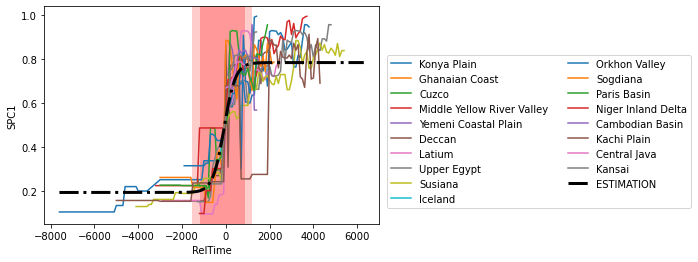

In [52]:
DF_Out = pd.DataFrame(columns=["NGA","RelTime","SPC1"])
DF_CC_Out = pd.DataFrame(columns =["NGA","RelTime","SPC1", "PolPop", "PolTerr",   "CapPop", "levels",
                         "government",  "infrastr", "writing", "texts", "money"])

for N in list(set(Data_RT["NGA"])):
    DF = Data_RT[Data_RT["NGA"] == N]
    plt.plot(DF["RelTime"],   
             DF["SPC1"], label=N)
    DF_Out = pd.concat((DF_Out, DF[["NGA", "RelTime", "SPC1"]]))
    DF_CC_Out = pd.concat((DF_CC_Out, DF[DF_CC_Out.columns]))
    #print(N)
    
plt.plot(x_show*T, y_hat, "-.",label="ESTIMATION", c = "k", linewidth=3)
plt.legend(bbox_to_anchor=(1.01, 0.8), ncol=2)
plt.ylabel("SPC1")
plt.xlabel("RelTime")
plt.axvspan(T1_scaled, T2_scaled, facecolor='r', alpha=0.4)
plt.axvspan(T2_scaled, T2_end_scaled, facecolor='r', alpha=0.2)
plt.axvspan(T1_start_scaled, T1_scaled, facecolor='r', alpha=0.2)
plt.savefig("SPC1_Time_Interval")
plt.show()

In [53]:
print(T1_start_scaled,T1_scaled, T2_scaled, T2_end_scaled)

-1527.1169269943725 -1169.279922168708 881.3767377674419 1217.0658204915098


In [54]:
DF_Out.index=np.arange(0, DF_Out.shape[0])
DF_Out.to_csv("RelTime_TimeSeries_SPC1.csv")
DF_CC_Out.index = DF_Out.index

In [55]:
Timeframes = np.array([T1_start_scaled,T1_scaled, T2_scaled, T2_end_scaled])

In [56]:
np.savetxt("Parameters_and_Times.txt",np.concatenate((p0, Timeframes)))

In [57]:
DF_CC_Out.to_csv("RelTime_TimeSeries_CC.csv")

In [58]:
DF_CC_Out

,NGA,RelTime,SPC1,PolPop,PolTerr,CapPop,levels,government,infrastr,writing,texts,money
0,Konya Plain,-7600,0.105089,3.293724,4.138263,1.442118,-0.055817,0.000000,0.000000,0.000000,0.0000,0.0
1,Konya Plain,-7500,0.105089,3.293724,4.138263,1.442118,-0.055817,0.000000,0.000000,0.000000,0.0000,0.0
2,Konya Plain,-7400,0.105089,3.293724,4.138263,1.442118,-0.055817,0.000000,0.000000,0.000000,0.0000,0.0
3,Konya Plain,-7300,0.105089,3.293724,4.138263,1.442118,-0.055817,0.000000,0.000000,0.000000,0.0000,0.0
4,Konya Plain,-7200,0.105089,3.293724,4.138263,1.442118,-0.055817,0.000000,0.000000,0.000000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
766,Kansai,1000,0.819800,7.096910,5.469822,5.176091,5.909872,0.690000,0.916667,1.000000,0.9875,4.0
767,Kansai,1100,0.746661,7.230449,4.176091,4.602060,5.083771,0.490000,0.840000,0.985714,0.9250,5.0
768,Kansai,1200,0.824980,7.397940,5.469822,5.000000,5.244956,0.710000,0.925000,0.983333,0.9875,5.0
769,Kansai,1300,0.923083,7.462398,5.469822,6.113943,6.534359,0.857143,1.000000,1.000000,1.0000,6.0
